<a href="https://colab.research.google.com/github/KristannaPerez/KristannaPerez/blob/main/GrafInterDNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La interpolación de Newton es un método para encontrar un polinomio que pase exactamente por un conjunto de puntos dados en un plano. Es particularmente útil cuando se tienen un número limitado de datos y se necesita una forma de estimar valores intermedios o extrapolar.

In [2]:
datos = {'x': [0, 1, 2, 3, 4, 5], 'y=F(x)': [-5, 1, 9, 25, 55, 105]}
df = pd.DataFrame(datos)
print(df)

   x  y=F(x)
0  0      -5
1  1       1
2  2       9
3  3      25
4  4      55
5  5     105


Este método usa la forma de diferencias divididas de Newton para construir el polinomio de interpolación, donde $[f(x_0),f(x_0,x_1)]$ son las diferencias divididas calculadas a partir de los valores conocidos de la función.

In [4]:
def newton_interpolation(x_values, y_values, x):
  n = len(x_values)
  # Calcula la tabla de diferencias divididas
  f = np.zeros((n, n))
  f[:, 0] = y_values
  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x_values[i + j] - x_values[i])

  # Evalúa el polinomio
  y = f[0, 0]
  for j in range(1, n):
    term = f[0, j]
    for i in range(j):
      term *= (x - x_values[i])
    y += term

  return y

# Obtén los valores de x e y del DataFrame
x_values = df['x'].values
y_values = df['y=F(x)'].values

# Evalúa el polinomio para un valor dado de x
x = 6  #Valor a cambiar
y = newton_interpolation(x_values, y_values, x)
print(f"El valor del polinomio interpolante de Newton en x = {x} es: {y}")



El valor del polinomio interpolante de Newton en x = 6 es: 181.0


En lo anterior calculamos para  $x=6$ usando la Interpolacion de Newton donde nos queda que $y=F(x)$  es igual a  $181$. Y le agregamos a nuestra tablita anterior el nuevo punto.

In [13]:
datos2 = {'x': [0, 1, 2, 3, 4, 5, 6], 'y=F(x)': [-5, 1, 9, 25, 55, 105, 181]}
df2 = pd.DataFrame(datos2)
print(df2)

   x  y=F(x)
0  0      -5
1  1       1
2  2       9
3  3      25
4  4      55
5  5     105
6  6     181


Para poder graficarlo usaremos lo que vimos en clase, donde tendremos los puntos marcados por una x, y el polinomio graficado.

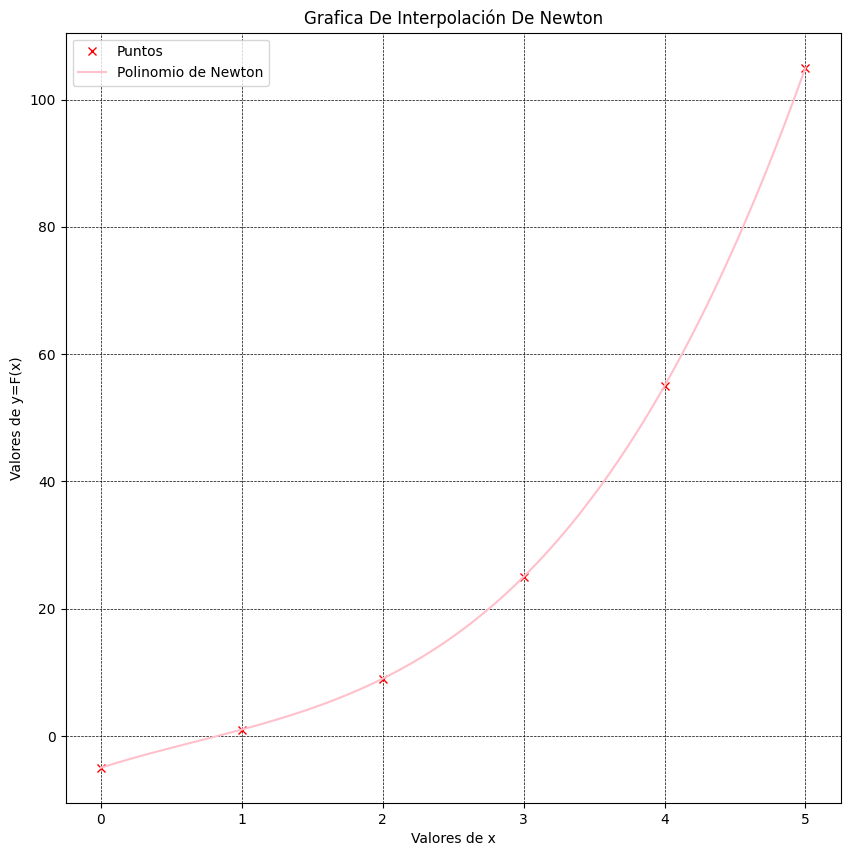

In [15]:
# Que usar para graficar
x_values = df['x'].values
y_values = df['y=F(x)'].values
x_range = np.linspace(min(x_values), max(x_values), 100)  # 100 puntos en el rango de x
y_interp = [newton_interpolation(x_values, y_values, x) for x in x_range]
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura
plt.plot(x_values, y_values, 'x', label='Puntos', color='red')  # Gráfica de los puntos originales
plt.plot(x_range, y_interp, '-', label='Polinomio de Newton', color='pink')  # Gráfica del polinomio
plt.xlabel('Valores de x')
plt.ylabel('Valores de y=F(x)')
plt.title('Grafica De Interpolación De Newton')
plt.legend()
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.show()